# DECISION TREE CLASSIFIER (DT)

Author: @angeladominguezgil

For the link, click [here](https://github.com/angeladominguezgil/Hypercholesterolemia)

* The DT model was developed with the **Scikit-Learn library** in Python. 
* The DT hyperparameter tuning was performed by the **GridSearchCV class**.

In [ ]:

#Import functions needed
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score 
from sklearn.utils.class_weight import compute_class_weight
from matplotlib.lines import Line2D



In [3]:
#Current directory
os.getcwd()
#Change working directory
os.chdir('C:\\Users\\Administrador\\Desktop\\python')
os.listdir()

['.ipynb_checkpoints',
 'data.csv',
 'graficos',
 'Graphics.ipynb',
 'Model_6800 pairs of DNA.ipynb',
 'model_DecisionTreeClassifier.ipynb',
 'model_hypercholesterolemia-checkpoint.ipynb',
 'model_LDA.ipynb',
 'model_RandomForest.ipynb']

In [ ]:
#Loading data: 
pd.read_csv("data.csv", sep=";")
data = pd.read_csv("data.csv",sep=";")
data.head(10) #Shows the first 10 rows of the dataset

,n,f(vij/c0)obj,Subset,f(c0)ref,D3(Set1),V2(Set1),D3(Set2),V1(Set2),D3(Set3),D1(Set4)
0,1,0,t,0.325301,2.515821,0.24,3.37,0.1,3.03,58.64
1,2,0,t,0.325301,2.475821,0.24,3.33,0.1,2.99,120.59
2,3,0,t,0.325301,2.475821,-1.01,3.33,0.1,2.99,115.82
3,4,0,v,0.325301,1.735821,0.24,2.59,0.1,2.25,7.90
4,5,0,t,0.325301,0.955821,0.24,1.81,0.1,1.47,2.53
5,6,0,t,0.325301,0.805821,0.24,1.66,0.1,1.32,-20.15
6,7,0,t,0.325301,0.175821,0.24,1.03,0.1,0.69,-25.52
7,8,0,v,0.325301,-0.194179,-1.01,0.66,0.1,0.32,24.49
8,9,0,t,0.325301,-0.194179,0.24,0.66,0.1,0.32,24.49
9,10,0,t,0.325301,-0.604179,0.24,0.25,0.1,-0.09,-53.58


In [5]:
#Data Splitting:
Y= data.iloc[:,1]
X = data.iloc[:, 3:]
print(Y) 
print(X)

0         0
1         0
2         0
3         0
4         0
         ..
369253    0
369254    0
369255    0
369256    0
369257    0
Name: f(vij/c0)obj, Length: 369258, dtype: int64
        f(c0)ref  D3(Set1)  V2(Set1)  D3(Set2)  V1(Set2)  D3(Set3)  D1(Set4)
0       0.325301  2.515821      0.24      3.37       0.1      3.03     58.64
1       0.325301  2.475821      0.24      3.33       0.1      2.99    120.59
2       0.325301  2.475821     -1.01      3.33       0.1      2.99    115.82
3       0.325301  1.735821      0.24      2.59       0.1      2.25      7.90
4       0.325301  0.955821      0.24      1.81       0.1      1.47      2.53
...          ...       ...       ...       ...       ...       ...       ...
369253  0.000000 -1.889286     -0.07     -1.50       0.1     -1.42    -17.50
369254  0.000000 -1.889286     -0.07     -1.50       0.1     -1.42    -17.50
369255  0.000000 -2.209286     -0.07     -1.82       0.1     -1.74    -61.52
369256  0.000000 -2.209286     -0.07     -1.82   

In [6]:
#Splitting Data into Training and Prediction Sets:
train_data = data[data["Subset"] == "t"]
pred_data = data[data["Subset"] == "v"]

# Model Preparation for Decision Tree
X_train_tree= train_data.iloc[:, 3:]
X_test_tree= pred_data.iloc[:, 3:]
y_train_tree= train_data.iloc[:, 1]
y_test_tree= pred_data.iloc[:, 1]

print(X_test_tree.shape)
print(X_train_tree.shape)
print(y_test_tree.shape)
print(y_train_tree.shape)

(92314, 7)
(276944, 7)
(92314,)
(276944,)


In [ ]:

#X_tree
mlr_X_train_tree= X_train_tree[['f(c0)ref', 'D3(Set1)', 'V2(Set1)','D3(Set2)','V1(Set2)','D3(Set3)','D1(Set4)']]
mlr_X_test_tree = X_test_tree[['f(c0)ref', 'D3(Set1)', 'V2(Set1)','D3(Set2)','V1(Set2)','D3(Set3)','D1(Set4)']]

# Define class weights to change the prior probability
#class_weights = {0: 0.3, 1: 0.7}  # Example weights, adjust as needed
seed = 40

# Define the decision tree model
tree_model= DecisionTreeClassifier(random_state=seed,class_weight='balanced') #Añadir argumento ccp_alpha=X si el árbol es muy complejo

The **hyperparamter tuning** starts here. The best combination of hyperparameters is evaluated by cross-validation. 

You can try different cominations by changing the following:

* 'criterion': ['gini', 'entropy', 'logloss' ],
* 'max_depht': [5,10,30,100,...], 
* 'min_samples_split' : [2,5,10,100,...]
* 'min_samples_leaf':[1,2,3,5,10,...] 

For extra info about more hyperparameters click [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [ ]:
#Define the hyperparameter search space
param_grid = {
    'criterion': ['gini'],
    'max_depth': [4],
    'min_samples_split': [int(0.01*len(X_train_tree))],
    'min_samples_leaf': [int(0.005*len(X_train_tree))]
}

# Perform hyperparameter search by cross-validation
grid_search_tree = GridSearchCV(tree_model, param_grid, cv=5, scoring='accuracy')
grid_search_tree.fit(mlr_X_train_tree, y_train_tree)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=40),
             param_grid={'criterion': ['gini'], 'max_depth': [4],
                         'min_samples_leaf': [1384],
                         'min_samples_split': [2769]},
             scoring='accuracy')

In [11]:

# Print the best hyperparameters 
best_params = grid_search_tree.best_params_
print("best hyperparameters :", best_params)

best hyperparameters : {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1384, 'min_samples_split': 2769}


In [12]:
# make predictions on the train set
y_pred_train_tree = grid_search_tree.predict(mlr_X_train_tree)
# calculate confusion matrix
cm_train_tree = confusion_matrix(y_train_tree, y_pred_train_tree)
print('Confusion matrix:','\n', cm_train_tree)
# calculate performance metrics
tn_train_tree, fp_train_tree, fn_train_tree, tp_train_tree = cm_train_tree.ravel()
specificity_train_tree = tn_train_tree / (tn_train_tree + fp_train_tree)
sensitivity_train_tree = tp_train_tree / (tp_train_tree + fn_train_tree)
accuracy_train_tree = (tp_train_tree + tn_train_tree) / (tp_train_tree + tn_train_tree + fp_train_tree + fn_train_tree)
false_positive_train_tree = fp_train_tree / (fp_train_tree + tn_train_tree)
print('Specificity:',specificity_train_tree,'\n', 'Sensitivity:', sensitivity_train_tree,'\n','Accuracy:', accuracy_train_tree)
mcc_train_tree = matthews_corrcoef(y_train_tree, y_pred_train_tree)
print(mcc_train_tree)

Confusion matrix: 
 [[ 67624  25234]
 [ 46862 137224]]
Specificity: 0.728251739214715 
 Sensitivity: 0.7454341992329672 
 Accuracy: 0.7396730024842567
0.45411285267206464


In [13]:
# make predictions on the test set
y_pred_test_tree = grid_search_tree.predict(mlr_X_test_tree)
#calculate confusion matrix
cm_pred_test_tree = confusion_matrix(y_test_tree, y_pred_test_tree)
print('Confusion matrix:', '\n', cm_pred_test_tree)
# calculate performance metrics on test set
tn_test_tree, fp_test_tree, fn_test_tree, tp_test_tree = cm_pred_test_tree.ravel()
specificity_test_tree = tn_test_tree / (tn_test_tree + fp_test_tree)
sensitivity_test_tree = tp_test_tree / (tp_test_tree + fn_test_tree)
accuracy_test_tree = (tp_test_tree + tn_test_tree) / (tp_test_tree + tn_test_tree + fp_test_tree + fn_test_tree)
false_positive_test_tree = fp_test_tree / (fp_test_tree + tn_test_tree)
print('Specificity;', specificity_test_tree,'\n','Sensitivity:', sensitivity_test_tree,'\n', 'Acurracy:', accuracy_test_tree)
mmc_test_tree=matthews_corrcoef(y_test_tree, y_pred_test_tree)
print(mmc_test_tree)

Confusion matrix: 
 [[22532  8411]
 [15636 45735]]
Specificity; 0.7281776169085092 
 Sensitivity: 0.7452216845089701 
 Acurracy: 0.7395086335767056
0.4537927259292524


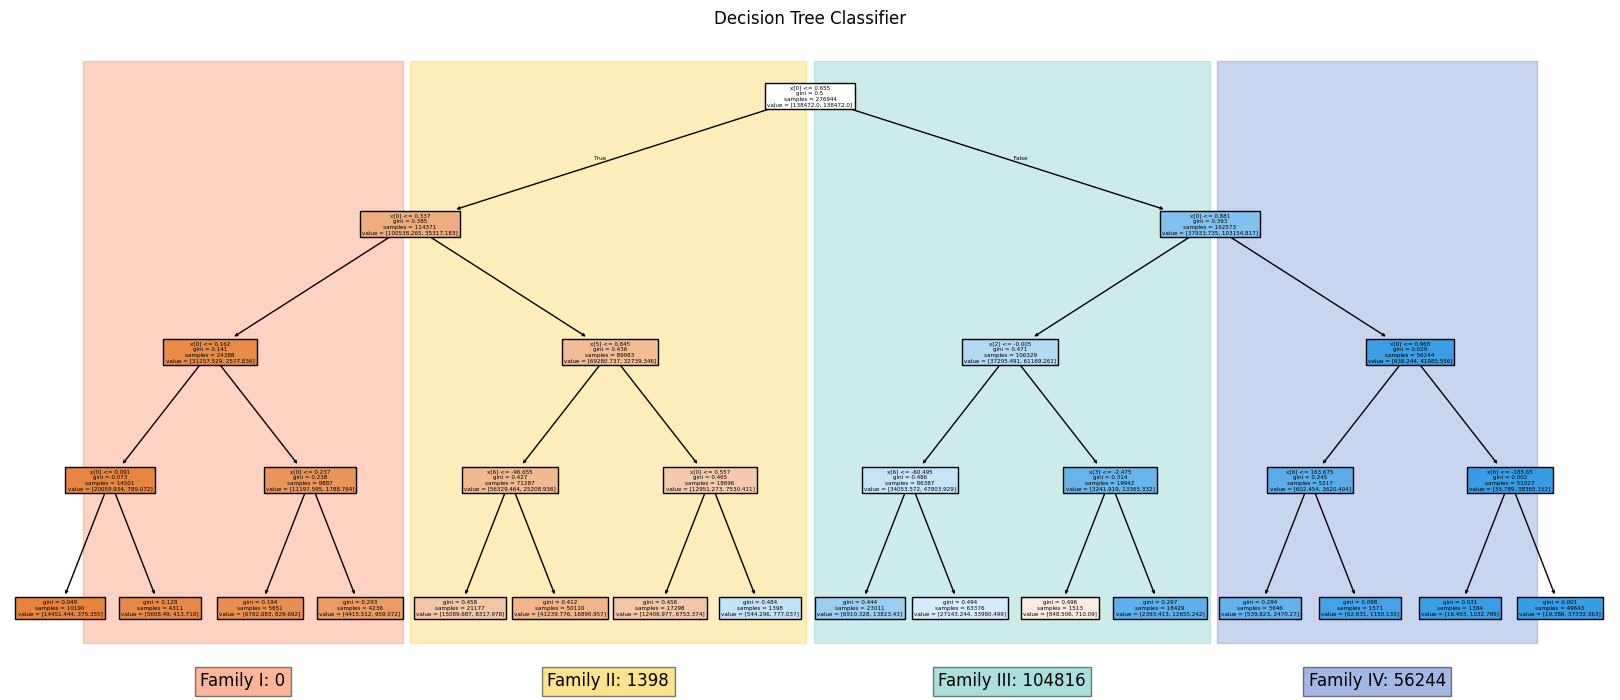

In [16]:
import os
import graphviz
from sklearn.tree import export_graphviz, plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Exportar el árbol a un archivo DOT
dot_data = export_graphviz(grid_search_tree.best_estimator_, out_file=None, feature_names=mlr_X_train_tree.columns,  
    class_names=['Clase 0', 'Clase 1'], filled=True, rounded=True, special_characters=True)  

# Añadir atributos de tamaño y relación directamente en el archivo DOT
dot_data = 'digraph Tree {\n' + 'ratio="compress";\n' + dot_data.split('digraph Tree {', 1)[1]  
# si se quiere cambiar el color del fondo añadir +'bgcolor="#cad5db";\n'

# Crear un gráfico a partir del archivo DOT
graph = graphviz.Source(dot_data)
graph.render(filename=os.path.join('C:\\Users\\Administrador\\Desktop\\python\\graficos', 'Árbol_4_niveles'), 
             format='png', cleanup=True)

# Mostrar el gráfico
graph.view()

# Crear una figura y un eje para añadir fondos de colores y números
fig, ax = plt.subplots(figsize=(20, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)


# Dibujar el árbol de decisiones
plot_tree(grid_search_tree.best_estimator_, filled=True, ax=ax)

# Añadir fondos de colores
background_areas = [
    {'x': [0, 0.88], 'y': [0, 1], 'color': '#f96c39', 'label': 'Family I: 0'},
    {'x': [0.9, 1.99], 'y': [0, 1], 'color': '#f9c61f', 'label': 'Family II: 1398'},
    {'x': [2.01, 3.1], 'y': [0, 1], 'color': '#59c0bb', 'label': 'Family III: 104816'},
    {'x': [3.12, 4], 'y': [0, 1], 'color': '#4d71cb', 'label': 'Family IV: 56244'},
  
]

# Dibujar las áreas de fondo y añadir los números
for area in background_areas:
    ax.fill_betweenx(area['y'], area['x'][0], area['x'][1], color=area['color'], alpha=0.3)
    # Añadir el número en la parte inferior del área
    ax.text(np.mean(area['x']), area['y'][0] - 0.05, area['label'], ha='center', va='top', fontsize=12, color='black',bbox=dict(facecolor=area['color'], alpha=0.5))
    ax.set_title('Decision Tree Classifier')
# Mostrar el gráfico
plt.show()
